In [1]:
"""
File used to generate phase diagrams.
"""

'\nFile used to generate phase diagrams.\n'

In [1]:
import random as rd 
import os
import re
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import colors
import simulations
import stability_diagrams as sd
import phase_diagrams as pdg
from tqdm import tqdm

In [2]:
alpha=0.3
alpha_p=0.05
w=0.3

beta=0.8
beta_p=0.05

b=1.0
q=0.0
pert=rd.uniform(-10**(-6),10**(-6))

p_init=0.75
g_init=np.array([1])


sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, p_init, g_init, pert)
sim = simulations.simulation(**sim_args)
p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
prod = [sim.Q_demand[i, 1, 1] + sim.Q_demand[i, 1, 0] for i in range(len(sim.Q_demand))]
print("last prod", prod[-1])
print("last price", sim.prices[-1][0])

P_EQ [0.5]
G_EQ [2.]
last prod 34.342813588688145
last price 0.6843534337467736


In [3]:
print("div?", pdg.detect_div(sim))
print("conv?", pdg.detect_conv(sim))
print("oscillates?", pdg.detect_periodicity(sim))
print("crises?", pdg.detect_crises(sim))
print(pdg.phase_classification(sim))

div? False
conv? True
oscillates? False
crises? False
1


<IPython.core.display.Javascript object>


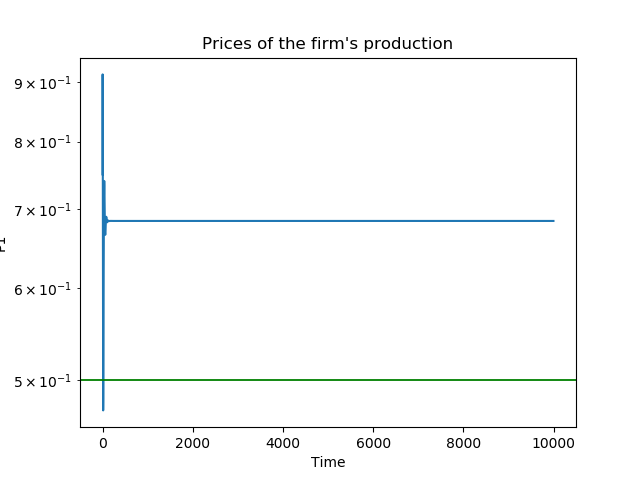

In [4]:
### Prices
%matplotlib notebook
fig, ax = plt.subplots()
ax.set_title("Prices of the firm's production")
ax.set_xlabel('Time')
ax.set_ylabel('P1')

ax.plot(sim.prices[1:-1])

plt.axhline(y=p_eq_0,linewidth=1.3, alpha=1, color="green", label="p=p_eq")
#plt.axhline(y=p_eq_1,linewidth=1.3, alpha=1, color="red", label="p=p_eq")
#plt.xscale("linear")
#plt.axhline(y=1.5, linewidth=1.3, alpha=1, color="red", label="p=p_eq")
ax.set_yscale("log")

#plt.grid(True)
plt.show()

In [24]:
sim.prices[-500:-1]

array([[0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.68435343],
       [0.684

<IPython.core.display.Javascript object>


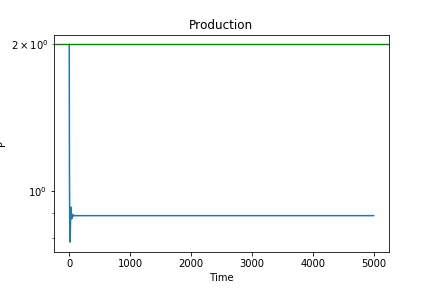

In [38]:
%matplotlib notebook
### Production
fig, ax = plt.subplots()
ax.set_title("Production")
ax.set_xlabel('Time')
ax.set_ylabel("P")

prod=[sim.eco.production_function(sim.Q_real[i, :, 1]) for i in range(len(sim.Q_real))]

ax.plot(prod[1:-1])

plt.axhline(y=g_eq_0,linewidth=1.3, alpha=1, color="green", label="prod=prod_eq")
#plt.axhline(y=sim.eco.production_function(sim.Q_real[-2, :, 1]),linewidth=1.3, alpha=1, color="red", label="prod=last prod value")

#plt.xscale("linear")s
ax.set_yscale("log")
#ax.set_ylim(0,float(max(prod))+100)
#plt.grid(True)
plt.show()

#directoire="/Users/boisselcamille/Documents/Stage_Econophysix/networks_code/OneFirmCase_Images_v1/2020_08_20_PerturbationsEquilibres_b<1_q=0/"+str(compteur)+"prods_b="+str(econ_args["b"])+"_q="+str(econ_args["q"])+"_"+state+".png"                
#fig.savefig(directoire)

<IPython.core.display.Javascript object>


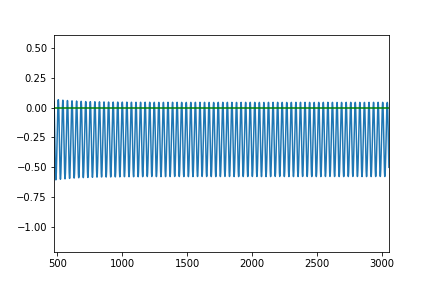

In [17]:
%matplotlib notebook
### Profits and surplus
profits=[sim.prices[i]*sim.Q_real[i, 1, 0] - sim.Q_real[i, 0, 1] for i in range(len(sim.Q_real))]
surplus=[sim.eco.firms.z*sim.eco.production_function(sim.Q_real[i, :, 1]) - sim.Q_demand[i, 1, 0] - sim.Q_demand[i, 0, 1] for i in range(len(sim.Q_real))]
plt.plot(profits[1:-1])
plt.axhline(0, color="green")
plt.show()

<IPython.core.display.Javascript object>


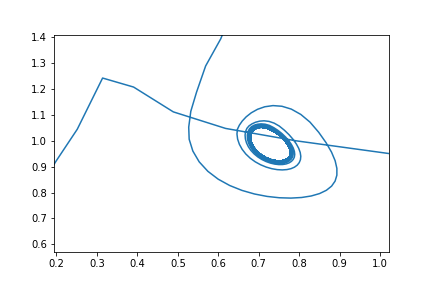

In [18]:
%matplotlib notebook
# Phase space 
plt.plot(sim.prices[1:-1],prod[1:-1])
plt.show()

In [21]:
### Quatre cas de figure : divergent oscillant, convergent oscillant, divergent non oscillant, convergent non oscillant
print(pdg.differentiate_div_conv(sim))
print(pdg.detect_periodicity(sim))

False
True


In [9]:
%matplotlib inline
# Actual phase diagram

#values_alpha=[0.3]
#values_alpha_p = [0.05]
#values_beta = [0.1, 0.6, 0.8]
#values_beta_p = [0.05]
#values_w = [0.1, 0.3]



alpha=0.3
alpha_p=0.05
w=0.1

beta=0.1
beta_p=0.05

b=1
q=0
pert = 0
directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q)+"/PhaseDiagrams" 
#os.mkdir(directoire)

scenario="alpha="+str(alpha)+"_alpha_p="+str(alpha_p)+"_beta="+str(beta)+"_beta_p="+str(beta_p)+"_w="+str(w)

values_p=np.logspace(-3,4,15)
values_g=[np.array([i]) for i in values_p]


    
behaviour=np.zeros((len(values_g), len(values_p)))
for i in tqdm(range(len(values_g))):
    for j in range(len(values_p)):
        g_init = values_g[i]
        p_init = values_p[j]
        sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, p_init, g_init, pert)
        sim = simulations.simulation(**sim_args)
        behaviour[i, j] = pdg.phase_classification(sim)
#np.save("")

100%|██████████| 15/15 [22:47<00:00, 91.18s/it] 


In [10]:
behaviour

array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 3., 3., 3., 3.],
       [0., 0., 0., 0., 0., 0., 0.

In [11]:
def plot_phasediagram(behaviour):
    """
    Function used for plotting the stability diagrams.
    :param data_diagramme_x: timescale x values
    :param data_diagramme_y: timescale y values
    :param data_diagramme_be: prices' long term behaviour for given (x,y)
    :param title: string, describes the set of parameters used in the sim.
    :param directoire: string, file used to save figures.
    :return: the saved plot
    """
    plt.imshow(behaviour, origin="lower")
    plt.colorbar()
    plt.xlabel(r"$p$")
    plt.ylabel(r"$\gamma$")
    plt.show()

In [14]:
print(values_p)

[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01 3.16227766e+01 1.00000000e+02 3.16227766e+02
 1.00000000e+03 3.16227766e+03 1.00000000e+04]


In [17]:
%matplotlib notebook
plot_phasediagram(behaviour)

<IPython.core.display.Javascript object>

In [16]:
%matplotlib notebook
plot_phasediagram(behaviour)

<IPython.core.display.Javascript object>

In [10]:
values_g[40]

array([517.94746792])

P_EQ [0.5]
G_EQ [2.]
0.0004 [0.0004]
P_EQ [0.5]
G_EQ [2.]
0.0004 [0.004]
P_EQ [0.5]
G_EQ [2.]
0.0004 [0.04]
P_EQ [0.5]
G_EQ [2.]
0.0004 [0.4]
P_EQ [0.5]
G_EQ [2.]
0.0004 [4]
P_EQ [0.5]
G_EQ [2.]
0.0004 [40]
P_EQ [0.5]
G_EQ [2.]
0.0004 [400]
P_EQ [0.5]
G_EQ [2.]
0.0004 [4000]
P_EQ [0.5]
G_EQ [2.]
0.0004 [40000]
P_EQ [0.5]
G_EQ [2.]
0.004 [0.0004]
P_EQ [0.5]
G_EQ [2.]
0.004 [0.004]
P_EQ [0.5]
G_EQ [2.]
0.004 [0.04]
P_EQ [0.5]
G_EQ [2.]
0.004 [0.4]
P_EQ [0.5]
G_EQ [2.]
0.004 [4]
P_EQ [0.5]
G_EQ [2.]
0.004 [40]


KeyboardInterrupt: 

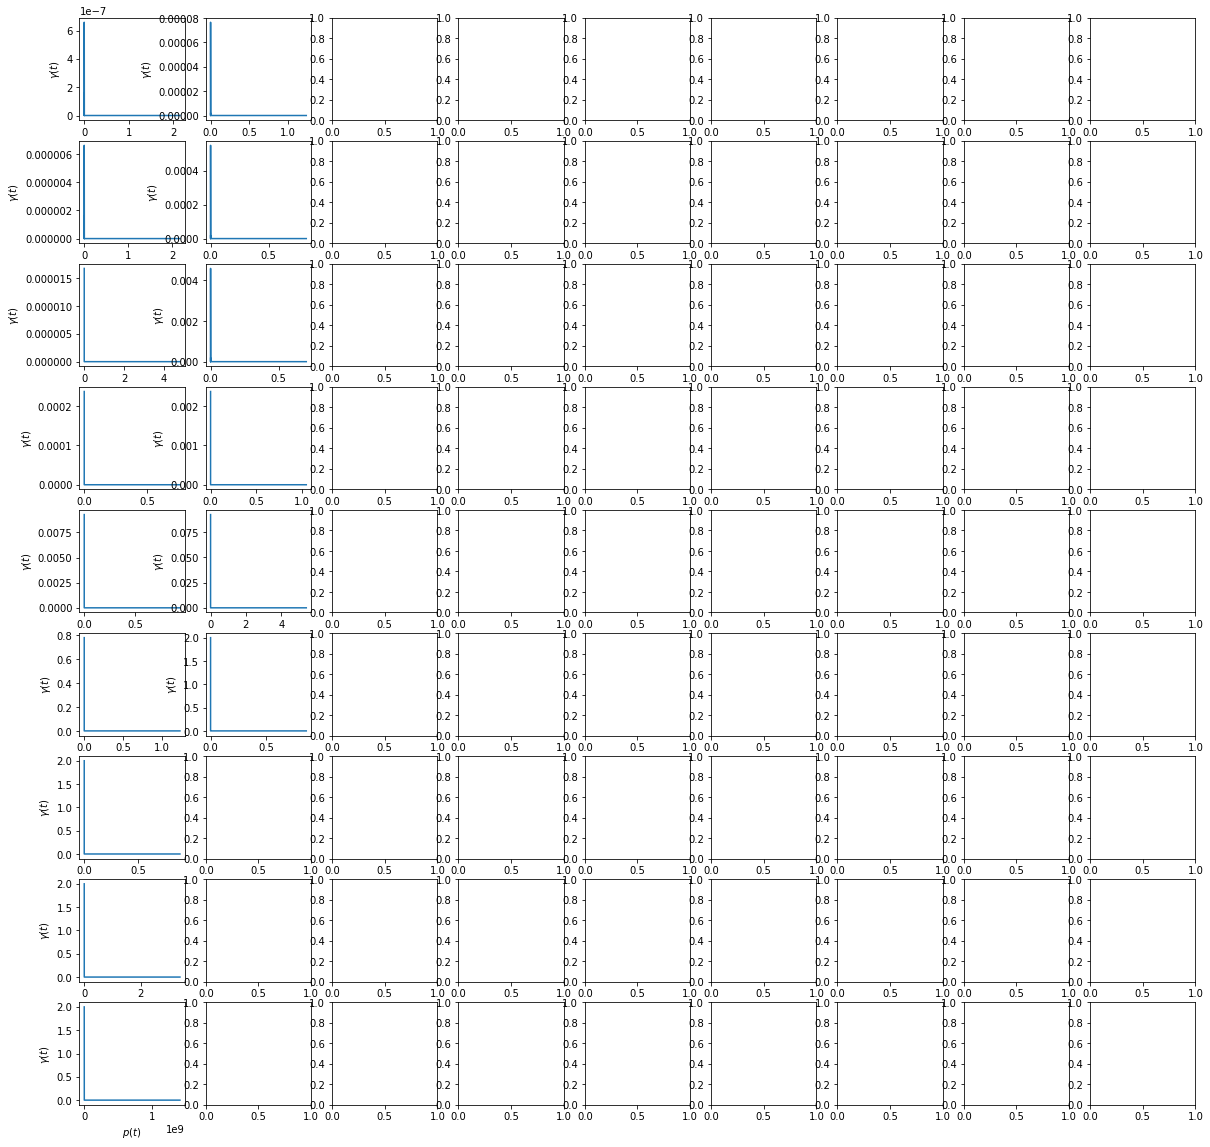

In [7]:
%matplotlib inline
# Many "phase diagrams" arranged in GRID of plots : 2D

#values_alpha=[0.3]
#values_alpha_p = [0.05]
#values_beta = [0.1, 0.6, 0.8]
#values_beta_p = [0.05]
#values_w = [0.1, 0.3]

directoire="/mnt/research-live/user/cboissel/network-economy/2020_09_04_Scenarii_b="+str(b)+"_q="+str(q)+"/PhaseDiagrams" 
#os.mkdir(directoire)

alpha=0.3
alpha_p=0.05
w=0.3

beta=0.8
beta_p=0.05

b=1
q=0
pert = 0

scenario="alpha="+str(alpha)+"_alpha_p="+str(alpha_p)+"_beta="+str(beta)+"_beta_p="+str(beta_p)+"_w="+str(w)

values_p=[4*(10**(i)) for i in range(-4, 5)]
values_g=[np.array([i]) for i in values_p]

figure, axes = plt.subplots(nrows=len(values_p), ncols=len(values_g), figsize=(20,20))

for p_init in values_p:
    for g_init in values_g:
        sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, p_init, g_init, pert)
        sim = simulations.simulation(**sim_args)
        p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
        prod = [sim.eco.production_function(sim.Q_real[i, :, 1]) for i in range(len(sim.Q_real))]
        print(p_init, g_init)
        axes[values_g.index(g_init), values_p.index(p_init)].set_xlabel(r"$p(t)$")
        axes[values_g.index(g_init), values_p.index(p_init)].set_ylabel(r"$\gamma (t)$")
        axes[values_g.index(g_init), values_p.index(p_init)].plot(sim.prices[1:-1],prod[1:-1])
figure.savefig(directoire+"/essai_diagramme_phases"+"_"+scenario+".png")
plt.show()

<IPython.core.display.Javascript object>


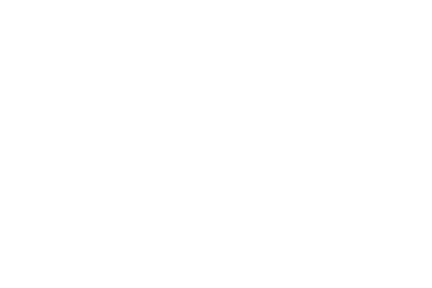

P_EQ [0.5]
G_EQ [2.]


<IPython.core.display.Javascript object>


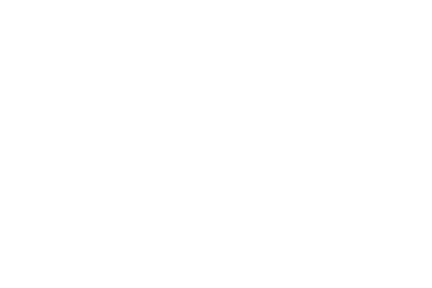

In [8]:
%matplotlib notebook
# Many "phase diagrams": 3D
alpha=0.3
alpha_p=0.2
w=0.1

beta=0.8
beta_p=0.1

b=1.0
q=0.0
pert = -8.864042540728256e-07

values_p=[5e16]
values_g=[np.array([3e27])]


fig = plt.figure()
ax = plt.axes(projection="3d")
ax.set_xlabel(r"$p(t)$")
ax.set_ylabel(r"$\gamma (t)$")
ax.set_zlabel(r"$\tilde{B}(t)$")
for p_init in values_p:
    for g_init in values_g:
        sim_args = simulations.variables_simulation(alpha, alpha_p, beta, beta_p, w, q, b, p_init, g_init, pert)
        sim = simulations.simulation(**sim_args)
        p_eq_0,g_eq_0=simulations.compute_equilibrium(sim)
        prod = [sim.eco.production_function(sim.Q_real[i, :, 1]) for i in range(len(sim.Q_real))]
        ax.plot3D(sim.prices[1:-1],prod[1:-1],sim.budget[1:-1])

plt.show()

In [9]:
x = sim.eco.coefficient
p1=0.5
expr = -sim.eco.house.kappa + sim.eco.firms.z*(sim.eco.lamb_a[0]*(sim.eco.firms.z**(-sim.eco.zeta))*(p1**(1 - x - sim.eco.zeta)) + sim.eco.lamb_a[1]*(sim.eco.firms.z**(-sim.eco.zeta))*(p1**(1 - x)))**(1/(1 - x)) - sim.eco.lamb_a[1]*(z**(sim.eco.q*sim.eco.zeta))*(lambda0*(sim.eco.firms.z**(-sim.eco.zeta))*(p1**(1 - x - sim.eco.zeta)) + sim.eco.lamb_a[1]*(sim.eco.firms.z**(-sim.eco.zeta))*(p1**(1 - x)))**(x/(1 - x))

ZeroDivisionError: float division by zero